In [1]:
#!pip install tqdm
#!pip install opencv-python
#!pip install matplotlib
#!pip install scipy
import mysql.connector as mysql
import database as db
import csv, sys
import image_generator
import feature_extractor
import numpy as np
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
#!unset CUDA_VISIBLE_DEVICES

In [2]:
myDB = db.connect_db("inference")
list_model = ["mobilenet_v1", "inception_v4", "resnet_v1_152"]

In [3]:
image_generator.main()
imgGen = image_generator.ImageGenerator('images/val/images', 'images/val/val.txt', 'images/val/synset_words.txt')
label_list = imgGen.get_label_list() 

images/val/images\ILSVRC2012_val_00016831.JPEG jay
images/val/images\ILSVRC2012_val_00004896.JPEG shovel
images/val/images\ILSVRC2012_val_00013441.JPEG streetcar, tram, tramcar, trolley, trolley car
images/val/images\ILSVRC2012_val_00012647.JPEG pot, flowerpot
images/val/images\ILSVRC2012_val_00010499.JPEG sliding door
images/val/images\ILSVRC2012_val_00008887.JPEG flamingo
images/val/images\ILSVRC2012_val_00048263.JPEG space shuttle
images/val/images\ILSVRC2012_val_00000349.JPEG spindle
images/val/images\ILSVRC2012_val_00049857.JPEG Brittany spaniel
images/val/images\ILSVRC2012_val_00048157.JPEG Boston bull, Boston terrier


In [4]:
img_nums = []
for i in range(1, 20001):                 # the range of images can be selected here
    img_nums.append(i)

img_paths = []
filenames = []
for i in range(len(img_nums)):
    img_path, _ = imgGen.get_image_data(img_nums[i])
    img_paths.append(img_path)                                             # we obtain the image paths and filenames
for i in range(len(img_nums)):
    img_name = imgGen.get_image_filename(img_nums[i])
    filenames.append(img_name)

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from scipy import ndimage
from PIL import Image, ImageStat

In [6]:
#Average of perceived brightness Test#1
path = 'images/val/images\ILSVRC2012_val_00000001.JPEG'                    #STUDENT'S APPROACH 
img = cv2.imread(path, 3)                                                  #read file using cv2
B = np.mean(img[0])                                                        #calculate using numpy
G = np.mean(img[1])
R = np.mean(img[2])
brightness_cv2 = (math.sqrt(0.241*(R**2) + 0.691*(G**2) + 0.068*(B**2)))  
                                                                           #STACKOVERFLOW APPROACH
img_imgstat = Image.open("images/val/images\ILSVRC2012_val_00000001.JPEG") #read file using Pillow
stat = ImageStat.Stat(img_imgstat)
r,g,b = stat.mean                                                          #calculate also using Pillow
brightness_pillow = math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

print(("Brightness with cv2 and numpy is {}").format(brightness_cv2))
print(("Brightness with Pillow {}").format(brightness_pillow))


Brightness with cv2 and numpy is 201.0322550669762
Brightness with Pillow 189.69286864864026


In [7]:
#Average of perceived brightness Test#2
img_imgstat = Image.open("images/val/images\ILSVRC2012_val_00000001.JPEG") 
stat = ImageStat.Stat(img_imgstat)
r,g,b = stat.mean                                                          
avg_to_perceived = math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

gs = (math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2)) 
     for r,g,b in img_imgstat.getdata())
perceived_to_avg = sum(gs)/stat.count[0]
print(("Average pixels to perceived is {}").format(avg_to_perceived))
print(("Perceived brightness to average is {}").format(perceived_to_avg))

Average pixels to perceived is 189.69286864864026
Perceived brightness to average is 189.70519652136747


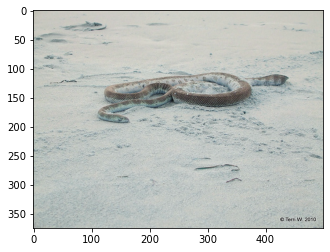

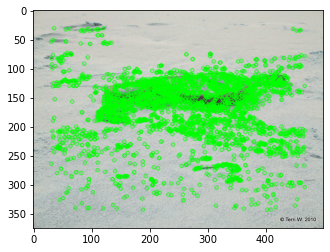

3657


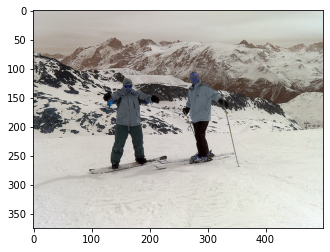

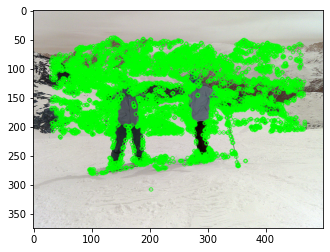

7029


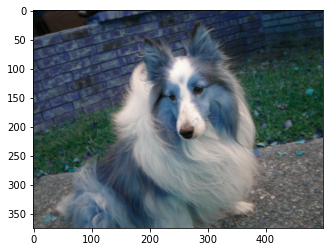

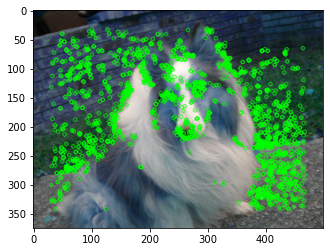

2248


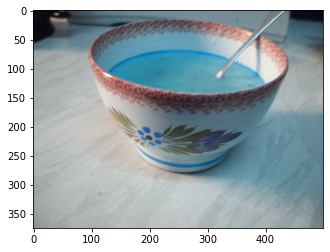

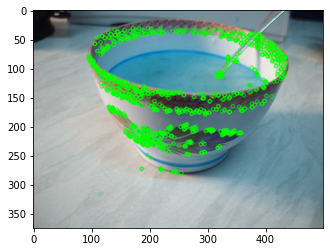

1211


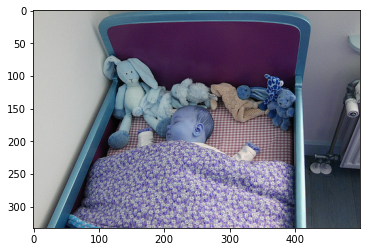

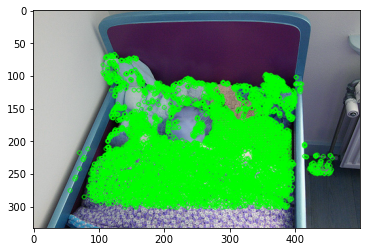

6270


In [15]:
#Number of Keypoints Test#1
orb = cv2.ORB_create(nfeatures = 10000) 
for x in range(5):
    img = cv2.imread(img_paths[x], 3)
    keypoints, descriptors = orb.detectAndCompute(img, None)
    kp_surf = len(keypoints)                                            # number of keypoints
    img2 = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)
    plt.imshow(img), plt.show()
    plt.imshow(img2), plt.show()
    print(kp_surf)

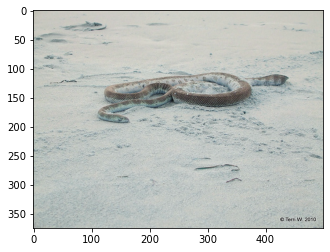

The area to perimeter ratio is 107.14285714285714


In [9]:
# Area to Perimeter Test#1
path = 'images/val/images\ILSVRC2012_val_00000001.JPEG'                    
img = cv2.imread(path, 3) 
plt.imshow(img), plt.show()
area_by_perim = img.shape[0] * img.shape[1] / ((img.shape[0] + img.shape[1]) * 2)             # area by perimeter
print(("The area to perimeter ratio is {}").format(area_by_perim))

[6.4890e+03 8.2990e+04 3.9155e+04 5.3178e+04 5.5360e+03 7.2000e+01
 8.0000e+01]
38.016244320077604


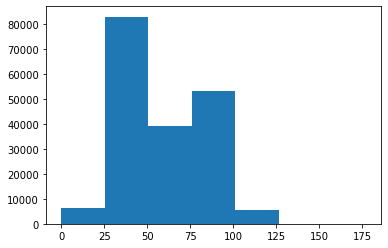

In [10]:
#Hue Test#1
path = 'images/val/images\ILSVRC2012_val_00000001.JPEG'                    #STUDENT'S APPROACH 
img = cv2.imread(path, 3) 
hsv = cv2.cvtColor( img, cv2.COLOR_BGR2HSV )
hue, sat, val = cv2.split(hsv)
hue = hue.flatten()
y, x, bars = plt.hist(hue, bins = 7)
y_min = np.where(y == y.min())[0][0]
x_min = np.mean((x[y_min:y_min + 2]))
y_max = np.where(y == y.max())[0][0]
x_max = np.mean((x[y_max:y_max + 2]))
hue1 = ((x_max * y.max()) + (x_min * y.min())) / (y.max() + y.min()) 
print(y)
print(hue1)

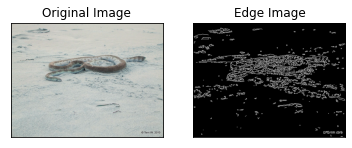

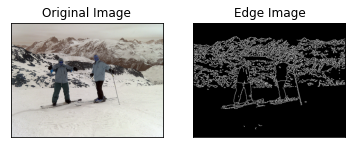

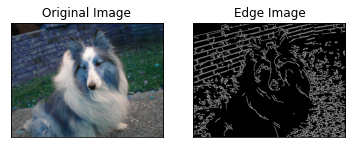

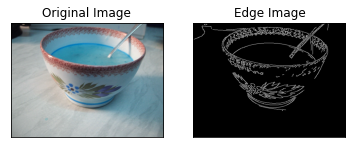

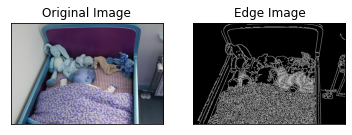

In [11]:
#Edge Length Test#1
for x in range(5):
    img = cv2.imread(img_paths[x], 3)
    edges = cv2.Canny(img, 100, 200)
    threshold = 100
    labeled, nr_objects = ndimage.label(edges > threshold) 
    unique, lengths = np.unique(labeled, return_counts=True)
    y, x, g = plt.hist(lengths[1:], bins = 7)
    y_min = np.where(y == y.min())[0][0]
    x_min = np.mean((x[y_min:y_min + 2]))
    y_max = np.where(y == y.max())[0][0]
    x_max = np.mean((x[y_max:y_max + 2]))
    edge_length1 = ((x_max * y.max()) + (x_min * y.min())) / (y.max() + y.min())           # edge length

    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

In [12]:
# Contrast Test#1
for x in range(5):
    img = cv2.imread(img_paths[x], 3)
    cv2.imshow('Original Image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    cv2.imshow('Gray Image',imgGrey)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#     imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#     contrast = imgGrey.std()  
#     plt.imshow(img), plt.show()
#     plt.imshow(imgGrey), plt.show()

In [13]:
#Aspect Ratio Test#1
path = 'images/val/images\ILSVRC2012_val_00000001.JPEG'
img = cv2.imread(path, 3)
h_by_w = float(img.shape[1]) / float(img.shape[0]) 
w_by_h = float(img.shape[0]) / float(img.shape[1]) 
print(("The height to width ratio is {}").format(h_by_w))
print(("The width to height ratio is {}").format(w_by_h))

The height to width ratio is 1.3333333333333333
The width to height ratio is 0.75
